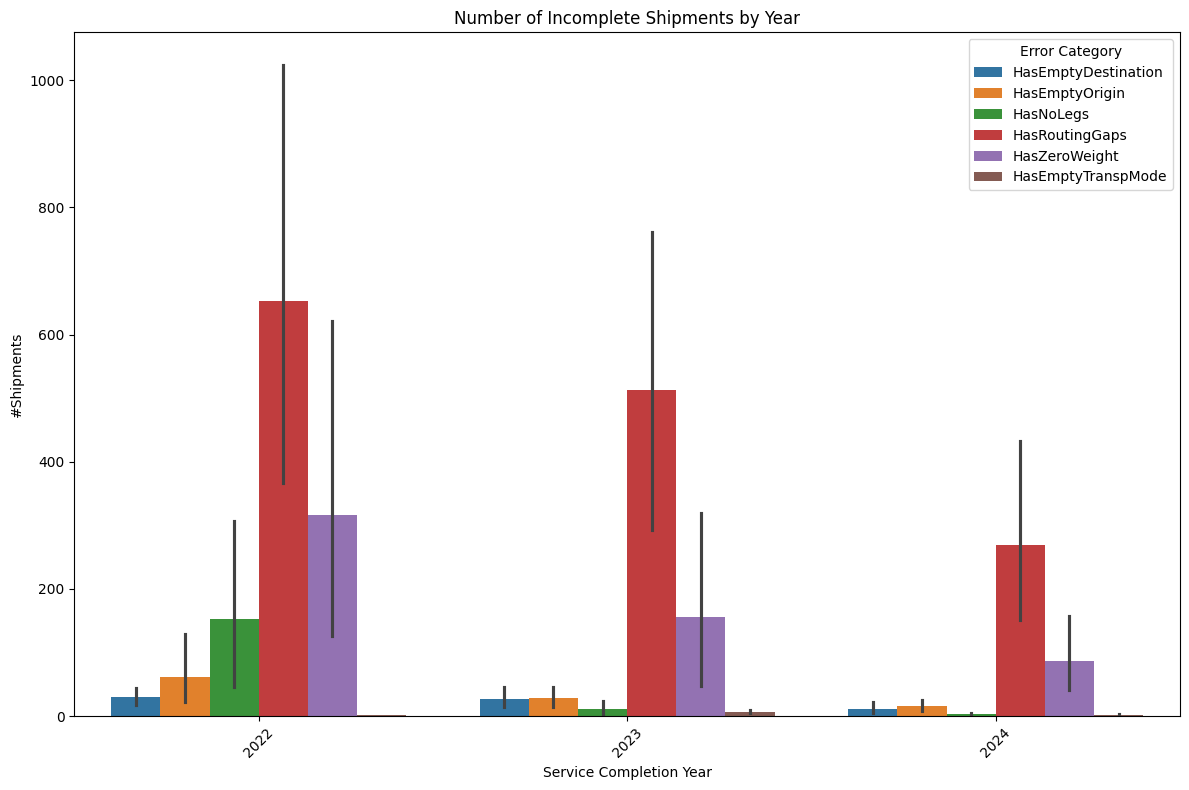

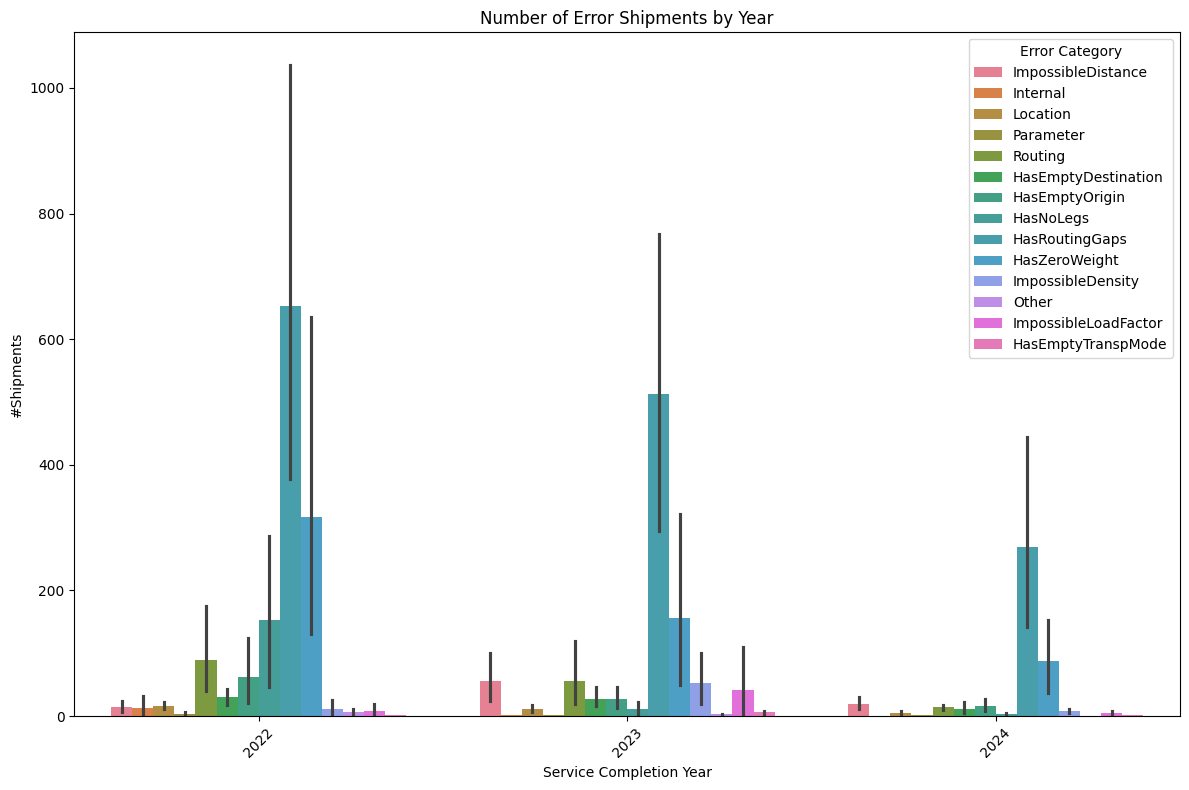

Tables and diagrams have been created and saved.


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Read the Excel file into a pandas DataFrame
df = pd.read_excel('input_quality.xlsx')

# Define the aggregation columns
agg_columns = [
    'Service Completion Year', 'Booking Type', 'Sending Agent Company', 
    'Transport Mode', 'Status', 'Error Category'
]

# Aggregate the data by summing the number of shipments
agg_data = df.groupby(agg_columns)['#Shipments'].sum().reset_index()

# Filter data for incomplete statuses
incomplete_data = agg_data[agg_data['Status'] == 'Incomplete']

# Filter data for errors
error_data = agg_data[agg_data['Error Category'] != '-']

# Save the aggregated data to an Excel file
with pd.ExcelWriter('quality_summary.xlsx') as writer:
    agg_data.to_excel(writer, sheet_name='All Data', index=False)
    incomplete_data.to_excel(writer, sheet_name='Incomplete Data', index=False)
    error_data.to_excel(writer, sheet_name='Error Data', index=False)

# Define a function to create diagrams
def create_diagram(data, title, filename, hue_column):
    plt.figure(figsize=(12, 8))
    sns.barplot(x='Service Completion Year', y='#Shipments', hue=hue_column, data=data)
    plt.title(title)
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.savefig(filename)
    plt.show()

# Create and save diagrams for each subset
create_diagram(incomplete_data, 'Number of Incomplete Shipments by Year', 'incomplete_diagram.png', 'Error Category')
create_diagram(error_data, 'Number of Error Shipments by Year', 'error_diagram.png', 'Error Category')

print("Tables and diagrams have been created and saved.")
